# ***Seattle Bridge data work flow***
### Commuting cyclists crossing the bridge

### Importing  the libraries

#### Analysis libraries

In [294]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [293]:
import numpy as np
import pandas as pd 
from pandas.core import *
#from jupyterthemes import jtplot
pd.plotting.register_matplotlib_converters()

##### Visualization Libraries

In [295]:
%matplotlib inline
import matplotlib.pyplot as plt
#jtplot.style(theme='onedork')
import seaborn as sns
import datetime 
from IPython.display import display, HTML, display_html

plt.style.use('fivethirtyeight')

In [307]:
plt.style.use('fivethirtyeight')

##### Scikit Learn imports

In [296]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [297]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

### Importing the data

In [298]:
data = pd.read_csv('Fremont.csv', index_col= 'Date')
#data['Date'] =data.index
data.columns = [ 'Total', 'East', 'West']
#data.index = data['Date']
#data = data.drop(columns='Date', inplace=True)
data.index = pd.to_datetime(data.index, format='%m/%d/%Y %I:%M:%S %p')


In [299]:
#from jupyterworkflow.data import get_fremont_data
#data = get_fremont_data()
#data
pd.plotting.register_matplotlib_converters()

### Data inspection

In [300]:
#head of the data 
display(data.head())

#tail of the data to see last entry 
display(data.tail())

#describe the data 
display(data.describe())

#shape of the data 
display(data.shape)

# display types
display(data.dtypes)

# display count
display(data.count())

#display the amount of nulls in the dataset
display(data.isnull().any())


,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


,Total,East,West
Date,,,
2019-10-31 19:00:00,111.0,44.0,67.0
2019-10-31 20:00:00,52.0,17.0,35.0
2019-10-31 21:00:00,41.0,16.0,25.0
2019-10-31 22:00:00,32.0,14.0,18.0
2019-10-31 23:00:00,18.0,6.0,12.0


,Total,East,West
count,62030.000000,62030.000000,62030.000000
mean,114.654732,52.859455,61.795276
std,145.686289,67.739036,90.417584
min,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000
50%,62.000000,29.000000,30.000000
75%,150.000000,71.000000,74.000000
max,1097.000000,698.000000,850.000000


(62040, 3)

Total    float64
East     float64
West     float64
dtype: object

Total    62030
East     62030
West     62030
dtype: int64

Total    True
East     True
West     True
dtype: bool

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62040 entries, 2012-10-03 00:00:00 to 2019-10-31 23:00:00
Data columns (total 3 columns):
Total    62030 non-null float64
East     62030 non-null float64
West     62030 non-null float64
dtypes: float64(3)
memory usage: 1.9 MB


In [302]:
data.isnull().sum().sort_index()

East     10
Total    10
West     10
dtype: int64

In [303]:
#Set frequency of the time series
data_day = data.asfreq(freq='1D')

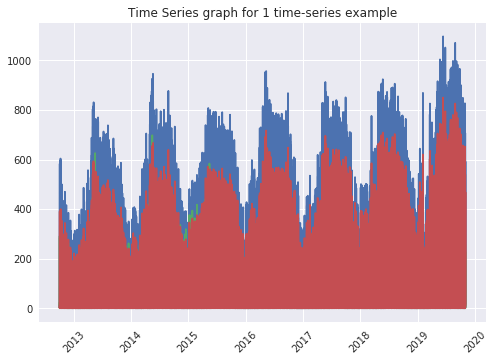

In [304]:
#plot time series data 
f, ax  = plt.subplots(1,1)
ax.plot(data[['Total','East','West']])

#add title
ax.set_title('Time Series graph for 1 time-series example')

# Rotate x-labels
ax.tick_params(axis = 'x', rotation = 45)

#show graph
plt.show()
plt.close()

  ## Using Pandas resample to get the overall picture of the whole data.

In [259]:
data

#### Notice how just by using the resample we can gain some insight on the data and how the usage of this bridge changes over time.  *Hourly*, *Daily*, *Weekly*, *Monthly* and *Annually*.

Text(0.5, 1.0, 'Daily Trips VS Date')

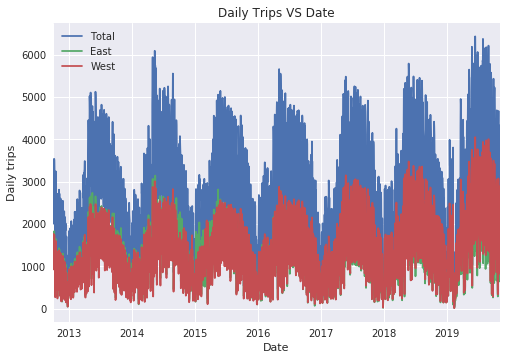

In [305]:
data.resample('D').sum().plot()
plt.ylabel('Daily trips')
plt.title('Daily Trips VS Date')

Text(0.5, 1.0, 'Weekly Trips VS Date')

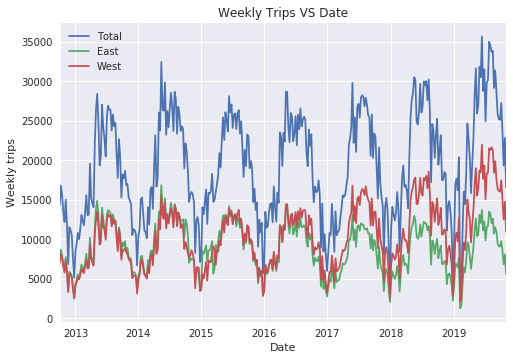

In [306]:
data.resample('W').sum().plot()
plt.ylabel('Weekly trips')
plt.title('Weekly Trips VS Date')

Text(0.5, 1.0, 'Monthly Trips VS Date')

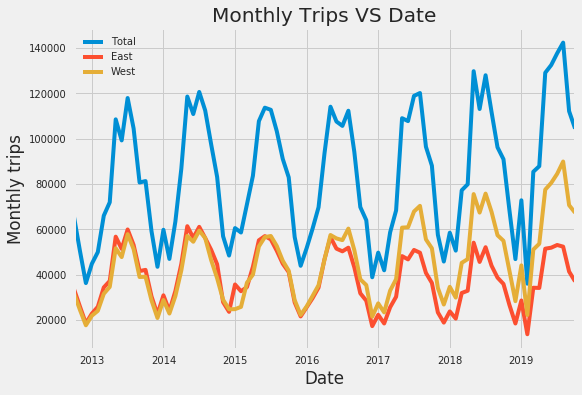

In [308]:
data.resample('M').sum().plot()
plt.ylabel('Monthly trips')
plt.title('Monthly Trips VS Date')

Text(0.5, 1.0, 'Annual Trips VS Date')

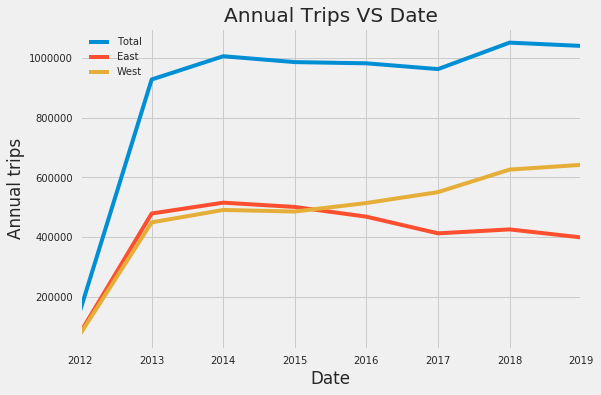

In [309]:
data.resample('Y').sum().plot()
plt.ylabel('Annual trips')
plt.title('Annual Trips VS Date')

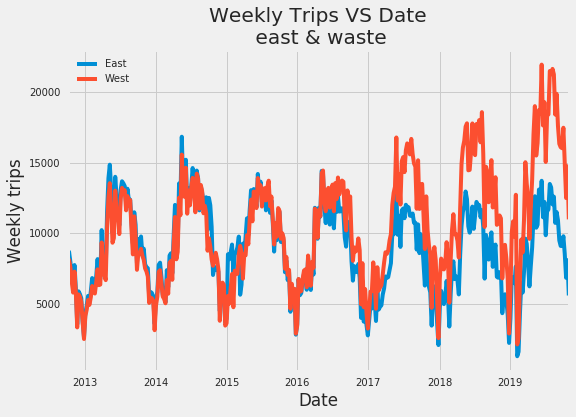

In [310]:
plt.subplots()
plt.title('Weekly Trips VS Date\n east & waste')
plt.ylabel('Weekly trips')
data['East'].resample('W').sum().plot(legend=True)
data['West'].resample('W').sum().plot(legend = True)

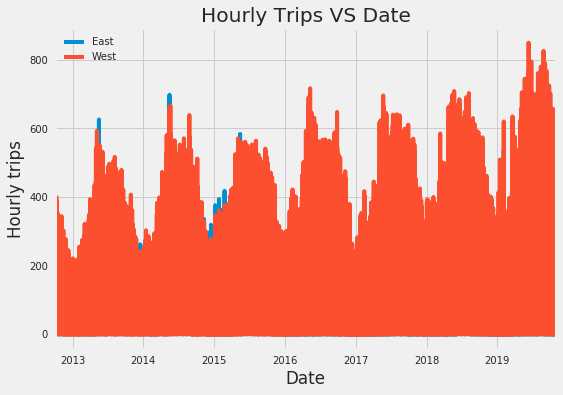

In [311]:
plt.subplots()
plt.ylabel('Hourly trips')
plt.title('Hourly Trips VS Date')
data['East'].resample('H').sum().plot(legend=True)
data['West'].resample('H').sum().plot(legend = True)

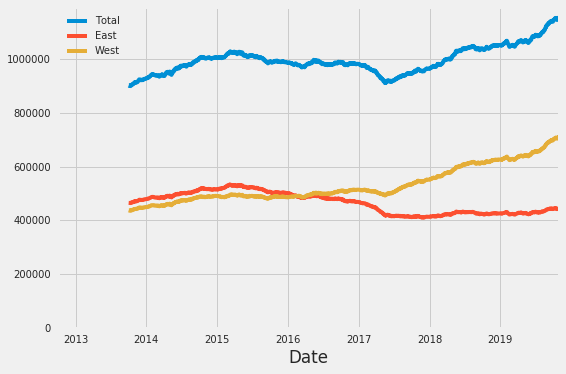

In [312]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

Text(0.5, 1.0, 'Number of trips VS Time of the day')

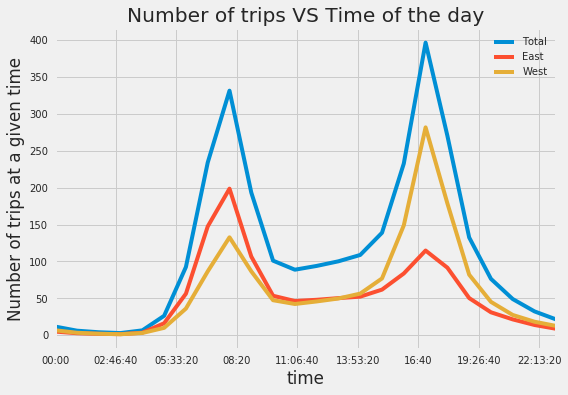

In [313]:
data.groupby(data.index.time).mean().plot()
plt.ylabel('Number of trips at a given time')
plt.title('Number of trips VS Time of the day')

In [314]:
# Set frequecy of time series
data_1day= data.asfreq(freq='1D')

#sort values 
data_1day = data.sort_index(ascending = True)

#display

display(data_1day.tail())

,Total,East,West
Date,,,
2019-10-31 19:00:00,111.0,44.0,67.0
2019-10-31 20:00:00,52.0,17.0,35.0
2019-10-31 21:00:00,41.0,16.0,25.0
2019-10-31 22:00:00,32.0,14.0,18.0
2019-10-31 23:00:00,18.0,6.0,12.0


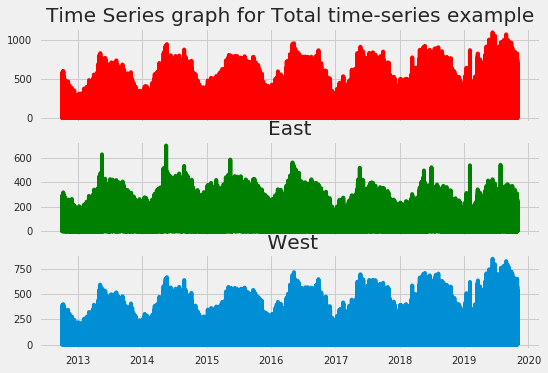

In [315]:
#plot time series data 
f, (ax, ax1, ax2 )  = plt.subplots(3,1, sharex=True)

ax.plot(data_1day[['Total']],  color = 'red')
#add title
ax.set_title('Time Series graph for Total time-series example')

ax1.plot(data_1day[['East']], color = 'green')
#add title
ax1.set_title('East')

ax2.plot(data_1day[['West']])
#add title
ax2.set_title(' West')

# Rotate x-labels
ax1.tick_params(axis = 'x', rotation = 45)

#show graph
plt.show()
plt.close()

In [316]:
data_no_na = data.fillna(value = 0 )
data_no_na.isnull().any()

Total    False
East     False
West     False
dtype: bool

In [317]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(df, total):
    
    #determin the rolling statistics for totals
    rolmean_total = df[total].rolling(window = 12, center = False).mean()
    rolstd_total = df[total].rolling(window = 12, center = False).std()
    
    #Plot rolling statistics
    tot_orig = plt.plot(df[total],
                    color ='blue',
                    label = 'Original')
    tot_mean = plt.plot(rolmean_total,
                    color ='red',
                    label = 'Rolling Mean')
    tot_std = plt.plot(rolstd_total,
                    color ='yellow',
                    label = 'Rolling Std')
    
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for {}'.format(total))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    #perform dickey-fuller test:
    # Null Hyposthesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    
    print('Results of Dickey-Fuller Test :')
    dftest = adfuller(df[total],
                     autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4],
                        index = ['Test Statistic',
                                'p-value',
                                '# Lags Used',
                                'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value {}'.format(key)]= value
    print(dfoutput)


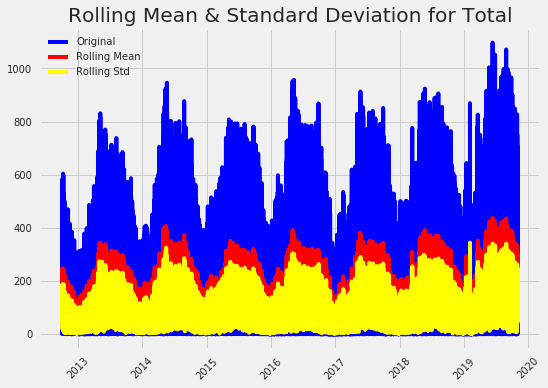

Results of Dickey-Fuller Test :
Test Statistic                   -21.847473
p-value                            0.000000
# Lags Used                       60.000000
Number of Observations Used    61979.000000
Critical Value 1%                 -3.430456
Critical Value 5%                 -2.861587
Critical Value 10%                -2.566795
dtype: float64


In [318]:
test_stationarity(df=data_no_na, total='Total')

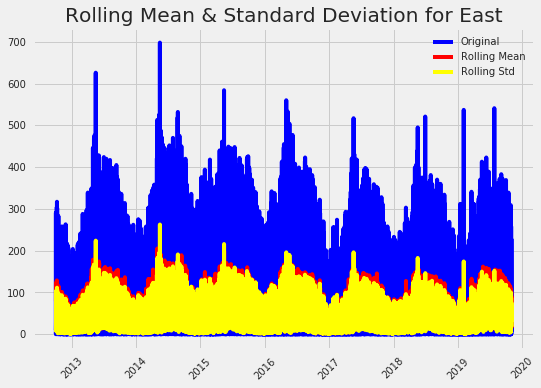

Results of Dickey-Fuller Test :
Test Statistic                   -21.244387
p-value                            0.000000
# Lags Used                       60.000000
Number of Observations Used    61979.000000
Critical Value 1%                 -3.430456
Critical Value 5%                 -2.861587
Critical Value 10%                -2.566795
dtype: float64


In [319]:
test_stationarity(df=data_no_na, total='East')

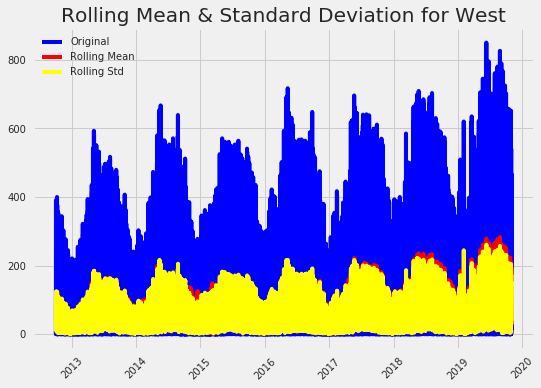

Results of Dickey-Fuller Test :
Test Statistic                   -21.985370
p-value                            0.000000
# Lags Used                       60.000000
Number of Observations Used    61979.000000
Critical Value 1%                 -3.430456
Critical Value 5%                 -2.861587
Critical Value 10%                -2.566795
dtype: float64


In [320]:
test_stationarity(df=data_no_na, total='West')

In [321]:
def plot_transformed_data(df, total, total_transform):
    """
    Plot transformed and original time series data 
    """
    
    # Plot time series data
    f, ax = plt.subplots(1,1)
    ax.plot(df[total])
    ax.plot(df[total_transform], color ='red')
    
    #Add title
    ax.set_title('{} and {} time-series graph'.format(total, total_transform))
    
    #Rotate x-labels
    ax.tick_params(axis = 'x', rotation = 45)
    
    #Add legend
    ax.legend([total, total_transform])
    
    plt.show()
    plt.close()
    
    return

In [322]:
# Transfromation - log total
data_no_na['total_log'] = data_no_na['Total'].apply(lambda x: np.log(x))

# Trasformation - 7- day moving averages of log ts
data_no_na['total_log_moving_avg'] = data_no_na['total_log'].rolling(window=7, 
                                                                     center=False).mean()

#Trasformation - 7-day moving avearage
data_no_na['total_moving_avg'] = data_no_na['Total'].rolling(window = 7, 
                                                             center=False).mean()

#Transformation - 7 day moving average total
# data_no_na['total_log_diff'] = data_no_na['total_log'] - data_no_na['total_log'].shift()
data_no_na['total_log_diff'] = data_no_na['total_log'].diff()

#Transformation - Difference between total and moving average ts
data_no_na['total_moving_avg_diff'] = data_no_na['Total'] - data_no_na['total_moving_avg']

#Transformation- Difference between logged total and logged moving average total
data_no_na['total_log_moving_avg_diff'] = data_no_na['total_log'] - data_no_na['total_log_moving_avg']

#Transformation- Difference between logged total and moving average totals
#data_no_na['total_log_moving_avg_diff'] = data_no_na['total_log'] - data_no_na['total_log_moving_avg']

#Transformation - Difference betweeen logged total and logged moving average total
data_no_na_transform = data_no_na.dropna()

#Transformation - Logged exponentially weighted moving averages (EWMA) total
data_no_na_transform['total_log_ewma'] = data_no_na['total_log'].ewm(halflife = 7,
                                                                    ignore_na = False,
                                                                    adjust = True).mean()

#Transformation- Difference between logged total and logged EWMA total
data_no_na_transform['total_log_ewma_diff'] = data_no_na_transform['total_log'] - data_no_na_transform['total_log_ewma']

#Display data 
display(data_no_na_transform.head())


,Total,East,West,total_log,total_log_moving_avg,total_moving_avg,total_log_diff,total_moving_avg_diff,total_log_moving_avg_diff,total_log_ewma,total_log_ewma_diff
Date,,,,,,,,,,,
2012-10-03 06:00:00,155.0,105.0,50.0,5.043425,2.513349,31.857143,1.609438,123.142857,2.530076,2.683413,2.360012
2012-10-03 07:00:00,352.0,257.0,95.0,5.863631,2.984589,80.285714,0.820206,271.714286,2.879042,3.231390,2.632241
2012-10-03 08:00:00,437.0,291.0,146.0,6.079933,3.524210,141.285714,0.216302,295.714286,2.555723,3.686690,2.393244
2012-10-03 09:00:00,276.0,172.0,104.0,5.620401,4.228104,180.428571,-0.459532,95.571429,1.392297,3.976750,1.643651
2012-10-03 10:00:00,118.0,72.0,46.0,4.770685,4.679710,196.571429,-0.849716,-78.571429,0.090974,4.089555,0.681129


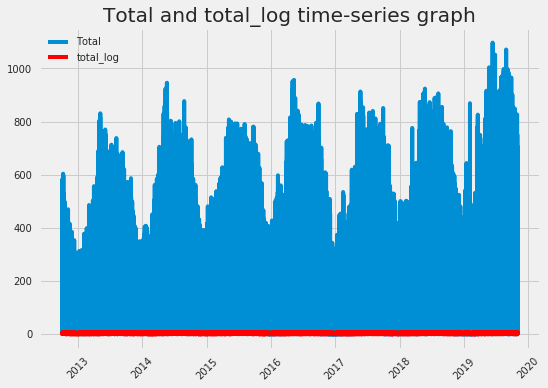

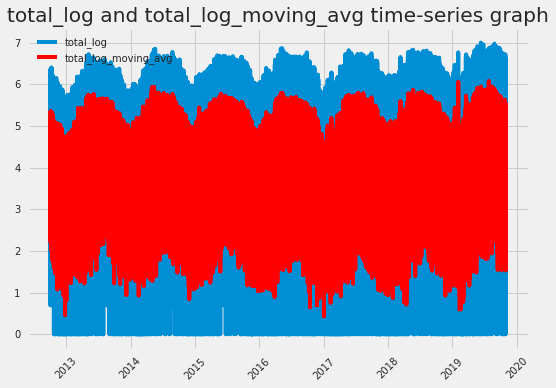

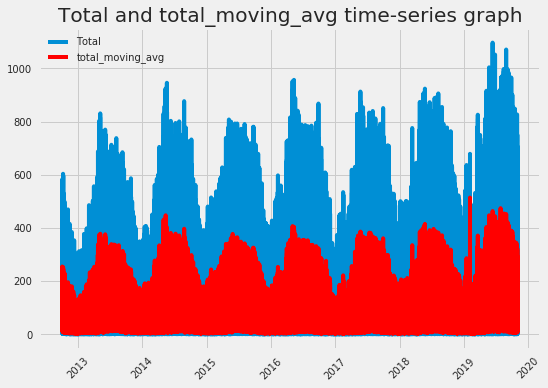

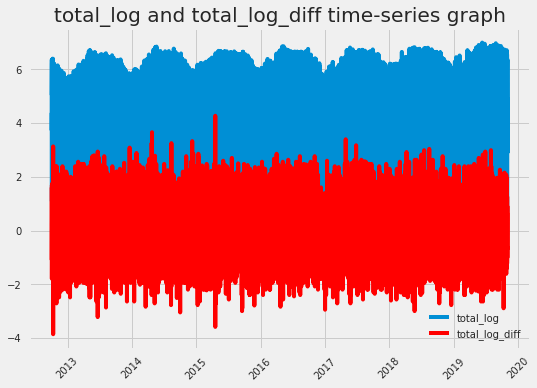

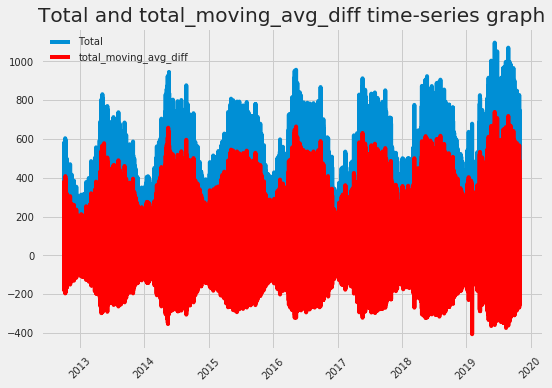

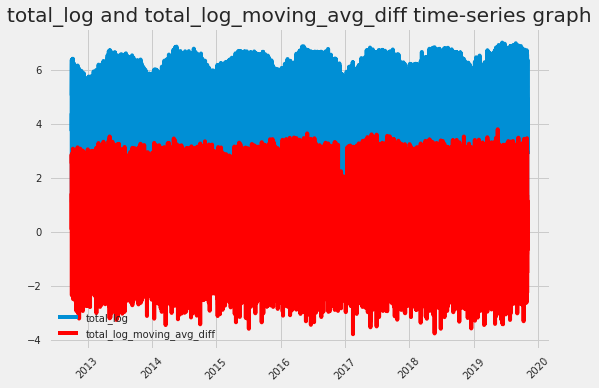

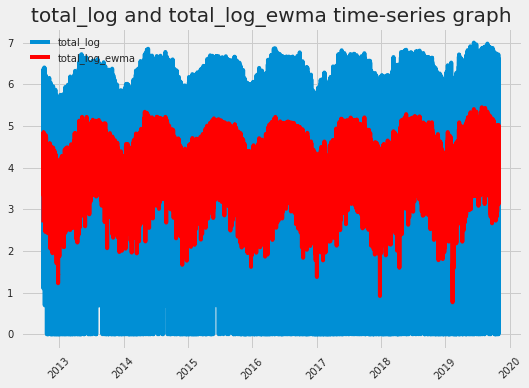

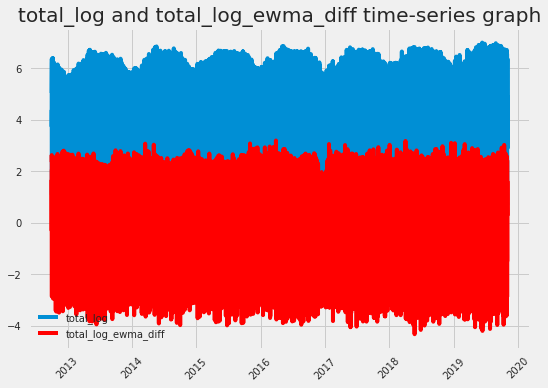

In [323]:
#Plot data
plot_transformed_data(df =data_no_na,
                      total = 'Total',
                      total_transform = 'total_log')
# Plot data 
plot_transformed_data(df =data_no_na,
                      total = 'total_log',
                      total_transform = 'total_log_moving_avg')
# Plot  data
plot_transformed_data(df = data_no_na_transform,
                      total = 'Total',
                      total_transform = 'total_moving_avg')
# plot data
plot_transformed_data(df = data_no_na_transform,
                      total = 'total_log',
                      total_transform = 'total_log_diff')

#Plot data
plot_transformed_data(df = data_no_na_transform,
                      total = 'Total',
                      total_transform = 'total_moving_avg_diff')
#Plot data
plot_transformed_data(df =data_no_na_transform,
                      total = 'total_log',
                      total_transform = 'total_log_moving_avg_diff')
#Plot data
plot_transformed_data(df =data_no_na_transform,
                      total = 'total_log',
                      total_transform = 'total_log_ewma')
#Plot data
plot_transformed_data(df =data_no_na_transform,
                      total = 'total_log',
                      total_transform = 'total_log_ewma_diff')

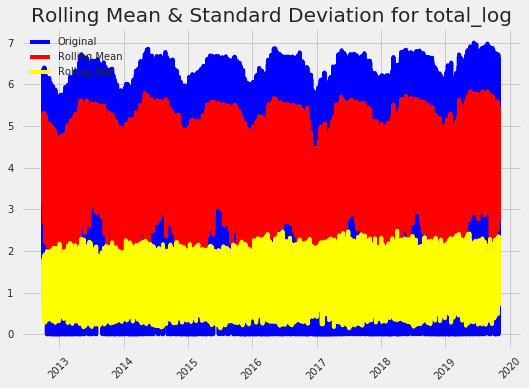

Results of Dickey-Fuller Test :
Test Statistic                   -20.015246
p-value                            0.000000
# Lags Used                       57.000000
Number of Observations Used    57974.000000
Critical Value 1%                 -3.430463
Critical Value 5%                 -2.861590
Critical Value 10%                -2.566797
dtype: float64


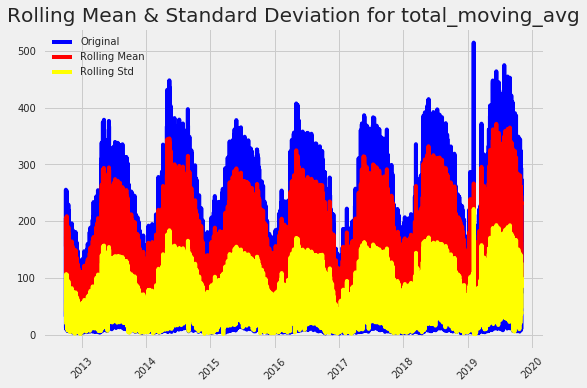

Results of Dickey-Fuller Test :
Test Statistic                   -21.686156
p-value                            0.000000
# Lags Used                       59.000000
Number of Observations Used    57972.000000
Critical Value 1%                 -3.430463
Critical Value 5%                 -2.861590
Critical Value 10%                -2.566797
dtype: float64


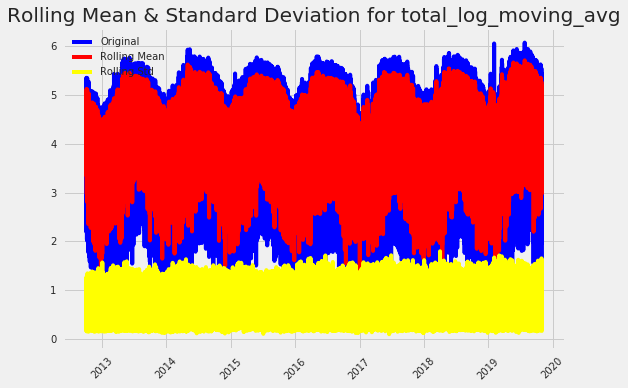

Results of Dickey-Fuller Test :
Test Statistic                   -21.301557
p-value                            0.000000
# Lags Used                       59.000000
Number of Observations Used    57972.000000
Critical Value 1%                 -3.430463
Critical Value 5%                 -2.861590
Critical Value 10%                -2.566797
dtype: float64


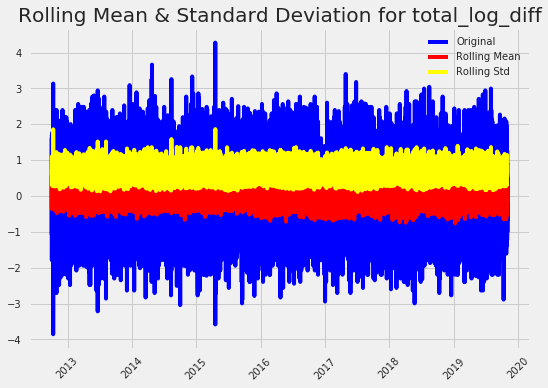

Results of Dickey-Fuller Test :
Test Statistic                   -27.087752
p-value                            0.000000
# Lags Used                       59.000000
Number of Observations Used    57972.000000
Critical Value 1%                 -3.430463
Critical Value 5%                 -2.861590
Critical Value 10%                -2.566797
dtype: float64


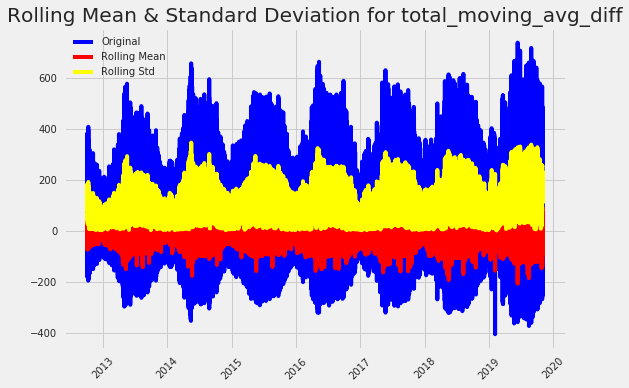

Results of Dickey-Fuller Test :
Test Statistic                   -32.290273
p-value                            0.000000
# Lags Used                       58.000000
Number of Observations Used    57973.000000
Critical Value 1%                 -3.430463
Critical Value 5%                 -2.861590
Critical Value 10%                -2.566797
dtype: float64


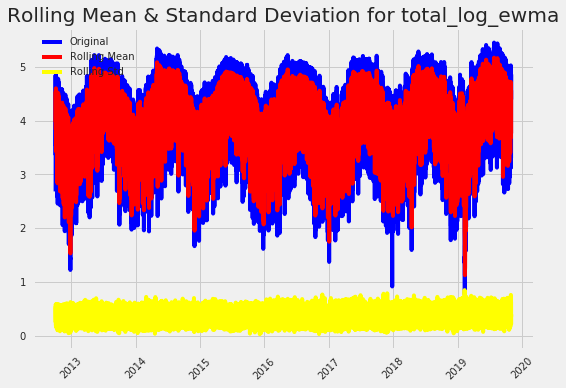

Results of Dickey-Fuller Test :
Test Statistic                -1.739730e+01
p-value                        4.970003e-30
# Lags Used                    5.900000e+01
Number of Observations Used    5.797200e+04
Critical Value 1%             -3.430463e+00
Critical Value 5%             -2.861590e+00
Critical Value 10%            -2.566797e+00
dtype: float64


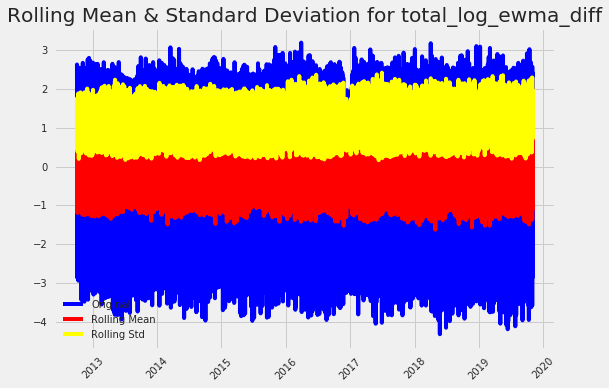

Results of Dickey-Fuller Test :
Test Statistic                   -37.530036
p-value                            0.000000
# Lags Used                       59.000000
Number of Observations Used    57972.000000
Critical Value 1%                 -3.430463
Critical Value 5%                 -2.861590
Critical Value 10%                -2.566797
dtype: float64


In [324]:
#Perfom stationary test
test_stationarity(df = data_no_na_transform,
                total = 'total_log')

#Perfom stationary test
test_stationarity(df = data_no_na_transform,
                total = 'total_moving_avg')

#Perform stationary test
test_stationarity(df = data_no_na_transform,
                total = 'total_log_moving_avg')

#Perfom stationary test
test_stationarity(df = data_no_na_transform,
                total = 'total_log_diff')

#Perfom stationary test
test_stationarity(df = data_no_na_transform,
                total = 'total_moving_avg_diff')

#Perfom stationary test
test_stationarity(df = data_no_na_transform,
                total = 'total_log_ewma')

#Perfom stationary test
test_stationarity(df = data_no_na_transform,
                total = 'total_log_ewma_diff')

In [325]:
def plot_decomposition(df, total, trend, seasonal, residual):
    """
    ploting time series data 
    """
    f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (15, 5), sharex =True)
    ax1.plot(df[total], label='Original')
    ax1.legend(loc ='best')
    ax1.tick_params(axis ='x', rotation= 45)
    
    ax2.plot(df[trend], label='Trend')
    ax2.legend(loc ='best')
    ax2.tick_params(axis ='x', rotation= 45)
    
    ax3.plot(df[seasonal], label='Seasonality')
    ax3.legend(loc ='best')
    ax3.tick_params(axis ='x', rotation= 45)
    
    ax4.plot(df[residual], label='Residuals')
    ax4.legend(loc ='best')
    ax4.tick_params(axis ='x', rotation= 45)
    plt.tight_layout()
    
    #Show graph
    plt.suptitle('Trend, Seasonal, and Residual Decomposition {}'.format(total),
                x = 0.5,
                y = 1.05,
                fontsize = 18)
    plt.show()
    plt.close()
    
    return
    
    

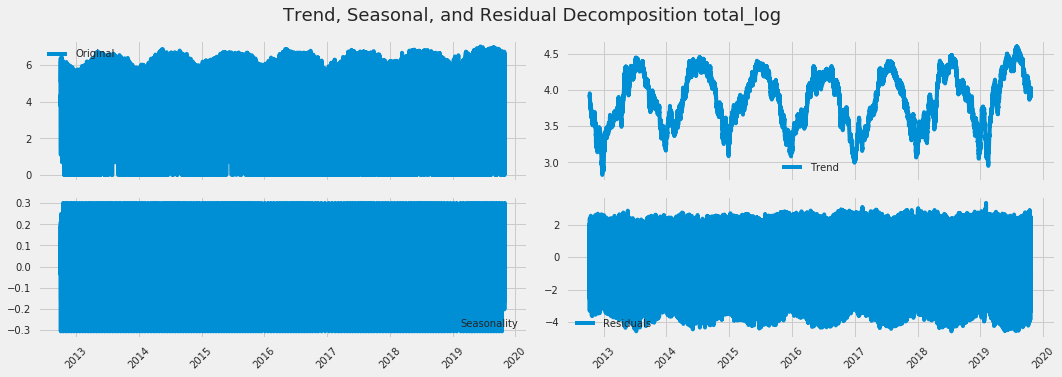

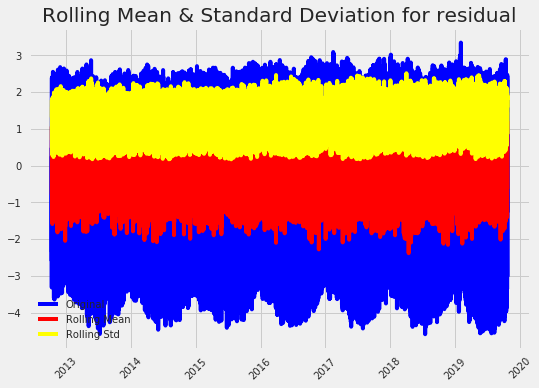

Results of Dickey-Fuller Test :
Test Statistic                   -35.201480
p-value                            0.000000
# Lags Used                       59.000000
Number of Observations Used    57608.000000
Critical Value 1%                 -3.430464
Critical Value 5%                 -2.861590
Critical Value 10%                -2.566797
dtype: float64


In [326]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data_no_na_transform['total_log'], freq = 365)

data_no_na_transform.loc[:,'trend'] = decomposition.trend
data_no_na_transform.loc[:,'seasonal'] = decomposition.seasonal
data_no_na_transform.loc[:,'residual'] = decomposition.resid

plot_decomposition(df= data_no_na_transform,
                   total = 'total_log',
                   trend = 'trend',
                   seasonal = 'seasonal',
                   residual = 'residual')

test_stationarity(df = data_no_na_transform.dropna(), total = 'residual')

In [327]:
def plot_acf_pacf(df, total):
    """
    Plot auto-correlation function (ACF) and partial auto-correlation (PACF) plots
    """
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize = (10, 5))
    
    #plot ACF
    ax1.plot(lag_acf)
    ax1.axhline(y=0, linestyle='--',color='gray')
    ax1.axhline(y=-1.96/np.sqrt(len(df[total])),linestyle='--',color='gray')
    ax1.axhline(y=1.96/np.sqrt(len(df[total])),linestyle='--',color='gray')
    ax1.set_title('A_Correlation Function for {}'.format(total))
    
    #Plot PACF
    
    ax2.plot(lag_acf)
    ax2.axhline(y=0, linestyle='--',color='gray')
    ax2.axhline(y=-1.96/np.sqrt(len(df[total])),linestyle='--',color='gray')
    ax2.axhline(y=1.96/np.sqrt(len(df[total])),linestyle='--',color='gray')
    ax2.set_title('PA_Correlation Function for {}'.format(total))
    
    plt.tight_layout()
    plt.show()
    plt.close()
    
    return
    

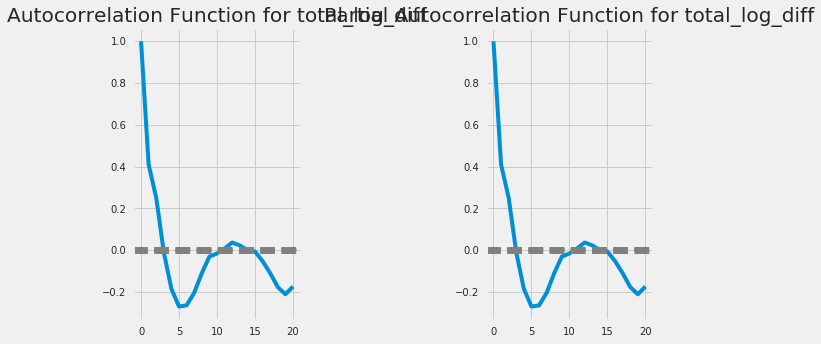

In [328]:
#ACF and PACF plots

from statsmodels.tsa.stattools import acf, pacf

#determine ACF AND PACF
lag_acf = acf(np.array(data_no_na_transform['total_log_diff']), nlags = 20)
lag_pacf = pacf(np.array(data_no_na_transform['total_log_diff']), nlags = 20)

#plot ACF AND PACF
plot_acf_pacf(data_no_na_transform, total ='total_log_diff')

In [329]:

def run_arima_model(df, total, p, d, q):
    """
    Run Arima model
    """
    from statsmodels.tsa.arima_model import ARIMA
    
    #FIT ARIMA model on time series
    model = ARIMA(df[total], order=(p,q,d))
    results_ = model.fit(disp=-1)
    
    #get length correct to calculate
    len_results=len(results_.fittedvalues)
    total_modified = df[total][-len_results:]
    
    #calculate root mean square error (RSME) and residual sm of squares (rss)
    rss = sum(results_.fittedvalues - total_modified)**2
    rmse = np.sqrt(rss/ len(df[total]))
    
    #plot fit 
    
    plt.plot(df[total])
    plt.plot(results_.fittedvalues, color ='red')
    plt.title('For ARIMA model ( {},{},{}) for total {}, RMSE: {}'.format(p, d, q, total, rss, rmse))
    
    plt.show()
    plt.close()
    
    return results_

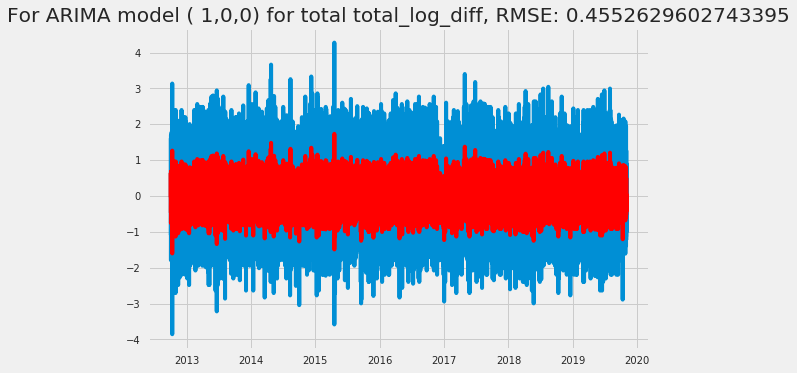

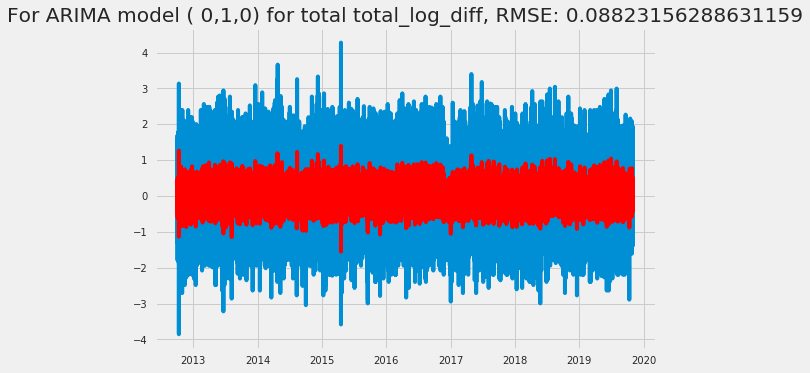

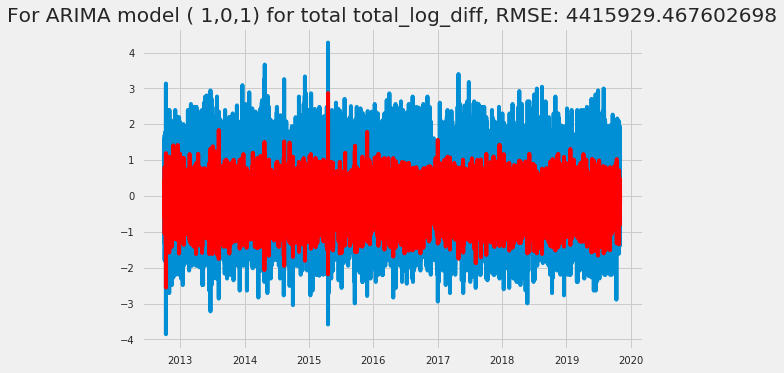

In [332]:
#note: I do difference in the transformation of the data 'ts_log_diff'
# AR model with 1st order differencing  - Arima (1,0,0)

model_AR = run_arima_model(df=data_no_na_transform,
                           total = 'total_log_diff',
                           p = 1, d=0,q=0)
# AR model with 1st order differencing  - Arima (0,1,0)
model_AR = run_arima_model(df=data_no_na_transform,
                           total = 'total_log_diff',
                           p = 0, d=1,q=0)
# AR model with 1st order differencing  - Arima (0,0,1)
model_AR = run_arima_model(df=data_no_na_transform,
                           total = 'total_log_diff',
                           p = 1, d=0, q=1)

In [331]:
from fbprophet import Prophet
import datetime 
from datetime import datetime 

In [333]:
def days_between(d1, d2):
    """
    Calculate the nuber of days between two dates. D1 is start date (inclusive) and d2 is end date (inclusive)
    """
    
    d1 = datetime.striptime(d1, "%Y-%m-%d")
    d2 = datetime.striptime(d2, "%Y-%m-%d")
    return abs((d2 -d1).days + 1)

In [ ]:
#Input for query

date_column = 'Date'
metric_column = 'Total'
table = data_no_na
start_training_date = '2012-10-03'
end_training_date = '2019-08-31'
start_forecasting_date = '2019-09-01'
end_forecasting_date = '2019-10-31'
year_to_estimate ='2018

#Input for forecasting
#future_num_points
# If doing different time intervals, change future_num_points
future_num_points = days_between(start_forecasting_date, end_forecasting_date)

cap = None #2e6

#growth: default = 'linear'
#Can also choose 'logistic'

growth = 'linear'

#n_changepoints: defaults = 25, uniformly palced in first 80% of time series
n_changepoints = 25

# changepoints_prior_scale: default = 0.05
# Increasing it will make the trend more flexible
changepoints_prior_scale = 0.05

#changepoints: example = ['2016-01-01']
changepoints = None

#holidays_prior_scale: default = 10
# If you find the holiday are overfitting, you can adjust their prior scale to smooth them
holidays_prior_scale = 10

#interval_width: default = 0.8
interval_width = 0.8

#mcmc_samples: defaults =0
# By defaults Prophets will only return uncertainty in the trend and observation noise.
# To get incertainity in seasonality, you must do full Bayesian sampling.
# Replaces typical MAP estimation with MCMC sampling, and takes Much Longer - e,g , 10, minutes instead of 10 seconds
# If you do full sampling, then you will see the unceratainty in seasonal components when you plot:

mcmc_samples = 0

# holiday: defaults = None
# thanksgiving = pd.DataFrame({
#     
#})
holidays = None
daily_seasonality = True

In [ ]:
# get relevant data - note: could also try this with total_log_diff
data_prophet = data_no_na_transform[['Total']]

##reset index
data_prophet = data_prophet.reset_index()

#rename columns
data_prophet = data_prophet.rename(columns = {'Date':'Date', 'Total':'Total'}) # can try with total_log_diff

# change 'ds' type from from datetime to date (necessary for FB prophet)
data_prophet['Date'] = pd.to_datetime(data_prophet['Date'])

#change 'y' type to numeric (necessary for fb prophet)
data_prophet['Total'] = pd.to_numeric(data_prophet['Total'], errors = 'ignore')

#Remove any outliers
# df.loc

In [ ]:
def creat_daily_forecast(data_no_na, cap,
                         holiday,growth,
                         n_changepoints = 25,
                         changepoints_prior_scale = 0.05,
                         changepoints =None,
                         holidays_prior_scale = 10,
                         interval_width = 0.8,
                         mcmc_sample = 1,
                         future_num_points = 10,
                         daily_seasonality = True):
    """
    Create forecast
    """
    # create copy of dataframe
    
    data_no_na_ = data_no_na.copy()
    
    # Add in growth parameter, which can change over time 
    # data_no_na['']

In [20]:
pivoted = data.pivot_table('Total',index=data.index.time, columns=data.index.date)
pivoted.iloc[:10,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0
05:00:00,31.0,26.0,25.0,5.0,9.0
06:00:00,155.0,142.0,105.0,27.0,17.0
07:00:00,352.0,319.0,319.0,33.0,26.0
08:00:00,437.0,418.0,370.0,105.0,69.0
09:00:00,276.0,241.0,212.0,114.0,103.0


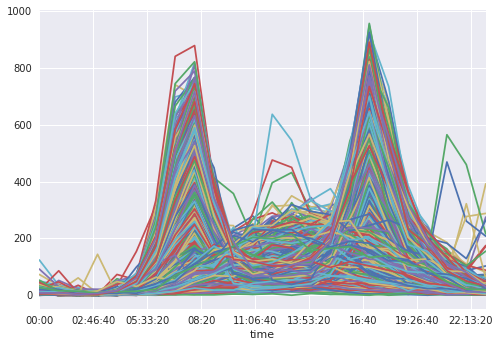

In [21]:
pivoted.plot(legend = False)

In [22]:
pivoted.index[:24]

Index([00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:00, 05:00:00, 06:00:00,
       07:00:00, 08:00:00, 09:00:00, 10:00:00, 11:00:00, 12:00:00, 13:00:00,
       14:00:00, 15:00:00, 16:00:00, 17:00:00, 18:00:00, 19:00:00, 20:00:00,
       21:00:00, 22:00:00, 23:00:00],
      dtype='object')

In [23]:
data.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2018-07-31 14:00:00', '2018-07-31 15:00:00',
               '2018-07-31 16:00:00', '2018-07-31 17:00:00',
               '2018-07-31 18:00:00', '2018-07-31 19:00:00',
               '2018-07-31 20:00:00', '2018-07-31 21:00:00',
               '2018-07-31 22:00:00', '2018-07-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=51072, freq=None)

## Scikit Learn to do further analysis of the data.

In [24]:
x  =pivoted.fillna(0).T.values
x.shape

(2128, 24)

In [25]:
#treating each day as a projection using principle component analysis
x2 = PCA(2, svd_solver='full').fit_transform(x)

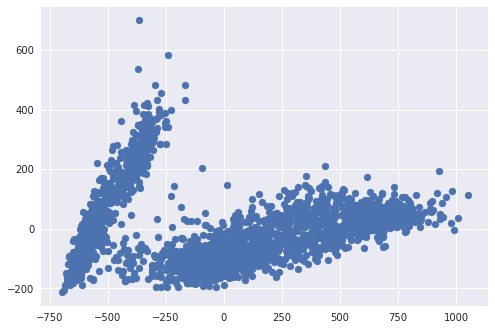

In [26]:
plt.scatter(x2[:,0],x2[:,1])

### using the gaussion mixture model to identify where the days fall

In [27]:
gmm = GaussianMixture(2)
gmm.fit(x)
labels = gmm.predict(x)
labels

array([0, 0, 0, ..., 1, 0, 0])

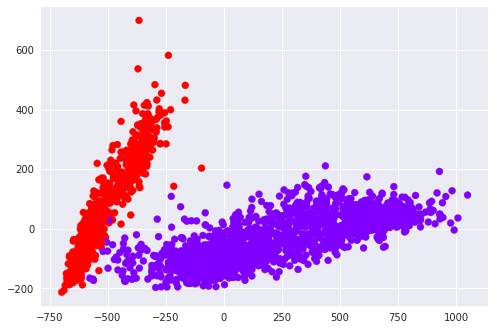

In [28]:
plt.scatter(x2[:,0],x2[:,1], c=labels, cmap='rainbow')


##  Commuting days vs Non commuting days

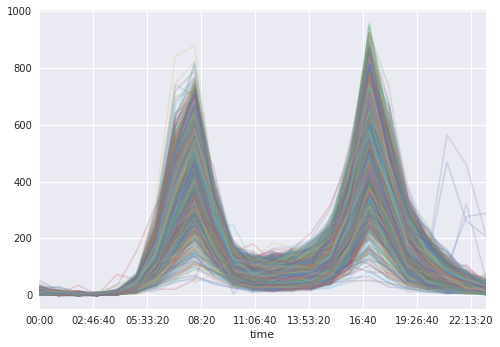

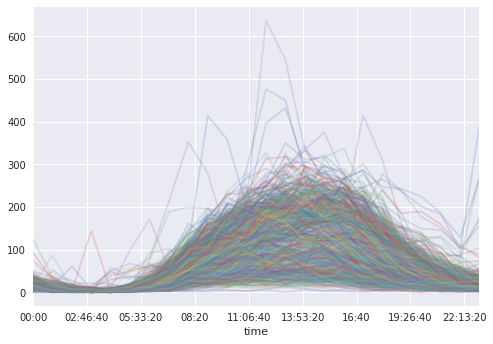

In [29]:
pivoted.T[labels == 0].T.plot(legend = False, alpha = 0.20)
pivoted.T[labels == 1].T.plot(legend = False, alpha = 0.20)

In [30]:
### The  

In [31]:
daysofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

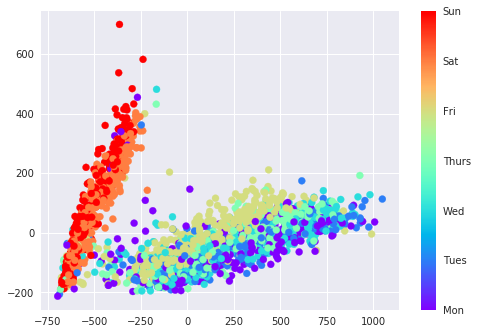

In [32]:
plt.scatter(x2[:,0],x2[:,1], c=daysofweek, cmap='rainbow')
cb = plt.colorbar(ticks=range(7))
cb.set_ticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

## Zooming in on the days of the week that happen to land on the non commuter days to see whats happening

In [33]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0)& (daysofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-23',
               '2018-07-24', '2018-07-25', '2018-07-26', '2018-07-27',
               '2018-07-30', '2018-07-31'],
              dtype='datetime64[ns]', length=1469, freq=None)